# Краткий туториал по использованию модуля вычислений Izh_net

## Networks
### Izhikevich_neuron
```python
class izhikevich_neuron:
    
    """
    Izhikevich neuron class 
    - save info about single Izhikevich neuron in group
    """
    def __init__(self, **kwargs):
        """
        keyword params:
        - id, name - from neuron;
        - preset - Neocortical neurons in the mammalian brain can be classified into
        several types according to the pattern of spiking and bursting seen in
        intracellular recordings. All excitatory cortical cells are divided into the
        following classes:
            + 'RS'(regular spiking): a=0.02, b=0.2, c=-65, d=8;
            + 'IB'(intrinsically bursting): a=0.02, b-0.2, c=-55, d=4;
            + 'CH'(chattering): a=0.02, b=0.2, c=-50,d=2;
            + 'FS'(fast spiking): a=0.1, b=0.2, c=-65, d=0.05;
            + 'TC'(thalamo-cortical): a=0.02, b=0.25, c=-65, d=0.05;
            + 'RZ'(resonator): a=0.1, b=0.26, c=-65, d=8;
            + 'LTS'(low-threshold spiking): a=0.02, b=0.25, c=-65, d=2;
            example: preset = 'RS' or set None to use another parametrs

        - a=0.02, b=0.2, c=-65, d=2 - standart parameters of Izhikevich neuron(when preset=None);
        - ap_threshold - threshold voltage(default 30mV)
        """
        preset_list = ['RS', 'IB', 'CH', 'FS', 'TC', 'RZ', 'LTS', None]
        preset = kwargs.get('preset', None)
        self.ap_threshold = kwargs.get('ap_threshold', 30)
        param_list = [
            [0.02, 0.2, -65, 8],
		    [0.02, 0.2, -55, 4],
		    [0.02, 0.2, -50, 2],
	        [0.1, 0.2, -65, 2],
		    [0.02, 0.25, -65, 0.05],
		    [0.1, 0.26, -65, 8],
		    [0.02, 0.25, -65, 2],
		[
                    kwargs.get('a', .02),
                    kwargs.get('b', .2),
                    kwargs.get('c', -65.0),
                    kwargs.get('d', 2.0)
                ]
            ]
        idx = preset_list.index(preset)
        assert preset in preset_list,f'Preset {preset} does not exist! Use one from {preset_list}'
        self.params = param_list[idx]
```
Есть мозможность создать нейроны с заданными пресетами и конвертировать их в вектора параметров для дальнейшего использования.

**Пример**
```python
 types = ['CH', 'CH', 'RS', 'RS', 'FS', 'FS', 'FS', 'FS', 'FS', 'FS']
 A, B, C, D = types2params(types)

```

In [1]:
from Izh_net import *
types = ['CH', 'CH', 'RS', 'RS', 'FS', 'FS', 'RZ', 'TC', 'LTS', 'FS']
A, B, C, D = types2params(types)
print(f'A = {A}\nB = {B}\nC = {C}\nD = {D}')


A = [0.02 0.02 0.02 0.02 0.1  0.1  0.1  0.02 0.02 0.1 ]
B = [0.2  0.2  0.2  0.2  0.2  0.2  0.26 0.25 0.25 0.2 ]
C = [-50. -50. -65. -65. -65. -65. -65. -65. -65. -65.]
D = [2.   2.   8.   8.   2.   2.   8.   0.05 2.   2.  ]


### Network


In [2]:
help(Network)

Help on class Network in module Izh_net:

class Network(builtins.object)
 |  Network(**kwargs)
 |
 |  Class Network
 |  Properties:
 |  N - quantity of neurons
 |  M(N, N) - mask of network connetctions if M[i, j]!=0 connection exists
 |  W(N, N) - matrix of synaptic weights
 |  tau_syn(N, N) - relaxation constants of sinaptic current
 |  Methods:
 |  connect(self, i, j, coef) - Устанавливает значение coef в маску сети между нейронами i -> j
 |  set_weights(W) - set weights' matrix with values from W with check network mask with current rule:
 |  if M[i, j] != 0 then Network.W[i, j] = W[i, j] else Network[i, j] = 0
 |
 |  Methods defined here:
 |
 |  __init__(self, **kwargs)
 |      args:
 |      N - size of network(default 10)
 |      M - matrix of network mask(shape:(N, N)) (default np.ones((10, 10)))
 |      W - sinaptic weigths(shape:(N, N)) (default np.ones(10, 10))
 |      TAU - relaxation times of synaptic current (shape: (N, N)) (default: np.ones((10, 10)))
 |
 |  __len__(self)

### NameNetwork

In [3]:
help(NameNetwork)

Help on class NameNetwork in module Izh_net:

class NameNetwork(Network)
 |  NameNetwork(**kwargs)
 |
 |  Класс: Именованая Сеть
 |  - Хранит методы класс Сеть
 |  - Хранит имена нейронов
 |
 |  Method resolution order:
 |      NameNetwork
 |      Network
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, **kwargs)
 |      args:
 |      N - size of network(default 10)
 |      M - matrix of network mask(shape:(N, N)) (default np.ones((10, 10)))
 |      W - sinaptic weigths(shape:(N, N)) (default np.ones(10, 10))
 |      TAU - relaxation times of synaptic current (shape: (N, N)) (default: np.ones((10, 10)))
 |
 |  print_connections(self)
 |      Выводит имена нейронов в формате "пресинапс -> постсинапс".
 |
 |  print_names(self)
 |      Выводит имена нейронов в сети и их индексы в списке неронов
 |      Можно использовать для определения номера нейрона по имени
 |
 |  set_name(self, i, name)
 |      Устанавливает имя для нейрона i.
 |
 |  -------------------------

### Izhikevich_Network
Модель нейрона Ижикевича
$$
\begin{cases}
\dot{v} = 0.04v^2 + 5v + 140 - u + I_{app} + I_{syn};\\
\dot{u} = a(bv-u)
\end{cases}
$$

$$
I_{syn} = \sum_{i=1}^{N}I_{syn}^{i};
\dot{I_{syn}}_{i} = w_iV_{peak}\delta(t-t_{i}) - I_{syn}^{i, j}/\tau_{i, j} 
$$

*step(dt=0.1, Iapp=0)* - метод для вычисления следующего состояния сети по схеме Эйлера. *dt* - шаг дискретного времени, *Iapp* - вектор приложенных токов. Размерность Iapp совпадает с количеством нейронов в сети

In [4]:
help(Izhikevich_Network)

Help on class Izhikevich_Network in module Izh_net:

class Izhikevich_Network(NameNetwork)
 |  Izhikevich_Network(**kwargs)
 |
 |  Network of Izhikevich neurons
 |
 |  Method resolution order:
 |      Izhikevich_Network
 |      NameNetwork
 |      Network
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, **kwargs)
 |      Params:
 |      Inherit from Name network
 |      keyword arguments:
 |      a, b, c, d - Izhikevich constants
 |      default: a = 0.1, b=0.2, c=-65, d=4
 |
 |  run_state(self, U, V, I_syn, I_app)
 |
 |  set_init_conditions(self, **kwargs)
 |
 |  set_params(self, **kwargs)
 |      Method to change Izhikevich params
 |      keyword arguments:
 |      a, b, c, d
 |
 |  step(self, dt=0.1, Iapp=0)
 |
 |  ----------------------------------------------------------------------
 |  Methods inherited from NameNetwork:
 |
 |  print_connections(self)
 |      Выводит имена нейронов в формате "пресинапс -> постсинапс".
 |
 |  print_names(self)
 |      Выв

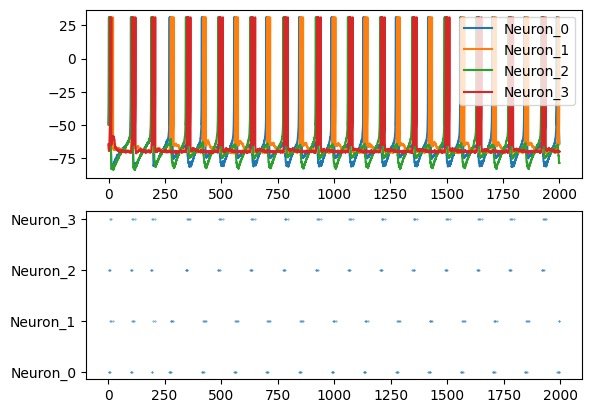

In [6]:
from net_preparation import *
def run_net(T, net, I_app):
    """
    Procedure of running network 
    args:
    T - discrete time array
    net - network object
    I_app - applied current
    I_aff - afferents activity
    retrun U, V - state of network array with shape(len(T), N), 
    N - size of
    """
    dt = T[1] - T[0]
    N = len(net)
    U = np.zeros((len(T), N))
    V = np.zeros((len(T), N))
    for i, t in enumerate(T):
        U[i] = net.U_prev
        V[i] = net.V_prev
        net.step(dt=dt, Iapp = I_app(t))
    return U, V


def test_Izhikevich_Network():
    N=4
    types = ['CH', 'FS', 'CH', 'FS']
    # Create params' array from neurons
    A, B, C, D = types2params(types)
    net = Izhikevich_Network(N=N, a=A, b=B, c=C, d=D)
    net.set_init_conditions(v_noise=np.random.normal(size=N))
    # Neuron_weigths
    W = [
            [0, 0, 0, -2.1],
            [1.7, 0, 0, 0],
            [0, -2.1, 0, 0],
            [0, 0, 1.7, 0]
        ]
    net.M = np.ones((N, N))
    net.set_weights(W)
    tau_syn = np.random.randint(15, 20, (N, N))
    net.set_synaptic_relax_constant(tau_syn)
    T = np.linspace(0, 2000, 20000)
    I = np.zeros(N)
    I[0] = 5
    I[2] = 5
    input = lambda t: (I + 1.2*np.random.normal(size=N))

    U, V= run_net(T, net, input)
    plt.subplot(211)
    for i in range(N):
        plt.plot(T, V[:, i], label=f"{net.names[i]}")
    plt.legend()


    plt.subplot(212)
    firing_rastr = create_firing_rastr(V, T, 30)
    plt.scatter(firing_rastr[0], firing_rastr[1], s=0.1)
    plt.yticks(list(range(N)), net.names)
    plt.show()

test_Izhikevich_Network()

### FizhugNagumoNetwork
Сеть нейронов Фицхью-Нагумо
$$
\begin{cases}
\dot{v}/ts = v(a-v)(v-1) - u + I_{app} + I_{syn}\\
\dot{u}/ts = bv-cu
\end{cases}
$$
ts - time scale variable
$$
I_{syn} = \sum_{i=1}^{N}I_{syn}^{i};
\dot{I_{syn}}_{i} = w_if(v_i) - I_{syn}^{i, j}/\tau_{i, j} 
$$
Выход нейрона определяется по формуле:
$$
f(v) = {1\over1+\exp(-\frac{v-v_{1/2}}{k})}
$$

[[0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]]
[[ 0.   0.   0.  -0.1]
 [ 0.1  0.   0.   0. ]
 [ 0.  -0.1  0.   0. ]
 [ 0.   0.   0.1  0. ]]


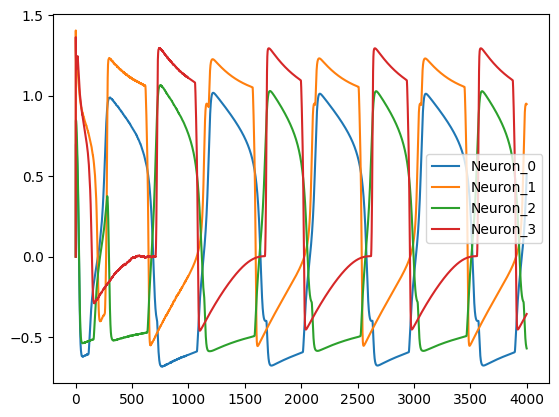

In [7]:
def run_net(T, net, I_app, I_aff):
    """
    Procedure of running network 
    args:
    T - discrete time array
    net - network object
    I_app - applied current
    I_aff - afferents activity
    retrun U, V - state of network array with shape(len(T), N), 
    N - size of
    """
    dt = T[1] - T[0]
    N = len(net)
    U = np.zeros((len(T), N))
    V = np.zeros((len(T), N))
    for i, t in enumerate(T):
        U[i] = net.U_prev
        V[i] = net.V_prev
        net.step(dt=dt, Iapp = I_app(t), Iaff=I_aff(t))
    return U, V


def test_FHN_Network():
    N = 4
    net = FizhugNagumoNetwork(N=N)
    net.a = np.array([-0.1, -0.1, 0.1, 0.1])
    net.V_th = 0.6*np.ones(N)
    net.ts = 0.2*np.array([0.5, 1, 0.5, 1])
    net.V = 0.5 + np.random.rand(N)
    # Neuron_weigths
    net.M = np.ones((N, N))-np.eye(N)
    W = [
            [0, 0, 0, -.1],
            [0.1, 0, 0, 0],
            [0, -.1, 0, 0],
            [0, 0, 0.1, 0]
        ]
    net.set_weights(W)
    tau_syn = 10*np.ones((N, N))
    net.set_synaptic_relax_constant(tau_syn)
    print(net.tau_syn)
    print(net.W)
    #print(net.M)
    T = np.linspace(0, 4000, 20000)
    I = np.zeros(N)
    I[0] = 0.
    I[1] = 0.
    input = lambda t: (I + 0.01*np.random.normal(size=N))*(t<1000)
    I_aff = lambda t: 0
    U, V = run_net(T, net, input, I_aff) 
    for i in range(N):
        plt.plot(T, V[:, i], label=f"{net.names[i]}")
    plt.legend()
    plt.show()

test_FHN_Network()

### IO_Network(network)


    Декоратор, создающий унаследованный от network объект класса, с добавлением матриц входа и выхода. В системах вход есть двух типов:
- стимулирующий ток(Iapp)
- афферентный ток(Iaff) - ток обратной связи
Суммарный ток:

$$
I_{tot} = I_{app} + I_{aff}; I_{app} = Q_{app}\cdot I_{app}; I_{aff} = Q_{aff}\cdot I_{aff}
$$



In [8]:
help(IO_Network_decorator)

Help on function IO_Network_decorator in module Izh_net:

IO_Network_decorator(cls)
    Inherit all properties and methods from Izhikevich network
    But It has properties like matrix of input and matrix of output
    Has arguments from cls cunstructor
    input_size - dimension of input
    N - dimension of state
    output_size - dimension of output
    Q_app - matrix(input_size, N) of input current
    Q_aff - matrix(input_size, N) of afferent current
    P - matrix(N, output_size) of output



In [9]:
@IO_Network_decorator
class Izhikevich_IO_Network(Izhikevich_Network):
    """
    Decorated Izhikevich Network
    With Input and Output matrixes
    """
    pass

help(Izhikevich_IO_Network)

Help on class IO_Network in module Izh_net:

class IO_Network(__main__.Izhikevich_IO_Network)
 |  IO_Network(*args, **kwargs)
 |
 |  Has arguments from cls cunstructor
 |  input_size - dimension of input
 |  N - dimension of state
 |  output_size - dimension of output
 |  Q_app - matrix(input_size, N) of input current
 |  Q_aff - matrix(input_size, N) of afferent current
 |  P - matrix(N, output_size) of output
 |
 |  Method resolution order:
 |      IO_Network
 |      __main__.Izhikevich_IO_Network
 |      Izhikevich_Network
 |      NameNetwork
 |      Network
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, *args, **kwargs)
 |
 |  __str__(self)
 |
 |  step(self, dt=0.1, Iapp=0, Iaff=0)
 |
 |  ----------------------------------------------------------------------
 |  Methods inherited from Izhikevich_Network:
 |
 |  run_state(self, U, V, I_syn, I_app)
 |
 |  set_init_conditions(self, **kwargs)
 |
 |  set_params(self, **kwargs)
 |      Method to change Izhikev

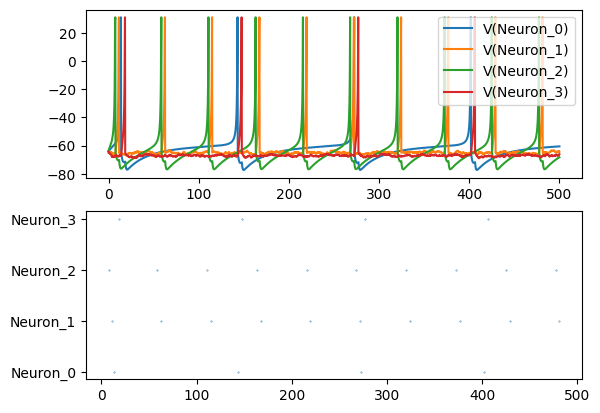

In [11]:
def test_IzhIOnet_sym():
    # Create matrix of application current
    # This current is applied to 1st and 3d neurons
    Q_app = np.array([
            [1, 0], # 1st -> 1st
            [0, 0],
            [0, 1], # 2nd -> 3d
            [0, 0]
        ])
    # Create matrix of afferents current
    # Afferent vector from 2 mascles consists of [Ia_f, II_f, Ib_f, Ia_e, II_e, Ib_f]
    Q_aff = np.array([
            [0, 0, 0, 0, 0, 0],
            [1, 0, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 1]
        ])
    P = np.array([
            [0, 0, 1, 0],
            [0, 0, 0, 1]
        ])
    W = np.array([
            [0, 0, 0, -1],
            [0, 0, 1, 0],
            [0, -1, 0, 0],
            [1, 0, 0, 0]
        ])
    tau_syn = np.array([
            [1, 1, 1, 20],
            [1, 1, 10, 1],
            [1, 20, 1, 1],
            [10, 1, 1, 1]
        ])

    net = Izhikevich_IO_Network(input_size=2, output_size=2,
                                afferent_size=6, N=4, Q_app=Q_app,
                                Q_aff = Q_aff , P=P, W=W)
    net.set_init_conditions(v_noise=np.random.normal(size=net.N))
    net.set_synaptic_relax_constant(tau_syn)
    T = np.linspace(0, 500, 2000)
    I_app = lambda t: np.array([4, 5])
    I_aff = lambda t: np.zeros(6) + 2*np.random.rand(6)
    U, V = run_net(T, net, I_app, I_aff)
    plt.subplot(211)
    for i in range(net.N):
        #plt.plot(T, U[:, i], label=f"U({net.names[i]})")
        plt.plot(T, V[:, i], label=f"V({net.names[i]})")
    plt.legend()
    plt.subplot(212)
    firing_rastr = create_firing_rastr(V, T, 30)
    plt.scatter(firing_rastr[0], firing_rastr[1], s=0.1)
    plt.yticks(list(range(net.N)), net.names)
    plt.plot()
    plt.show()
test_IzhIOnet_sym()

## Physical units
- Pendulum - base class to calculate dynamics of pendulum(more help(Pendulum))
- OneDOFLimb(Pendulum) - Limb with one degree of freedom, controlled by to muscles
- OneDOFLimb_withGR(OneDOFLimb) - OneDOFLimb with ground reaction force

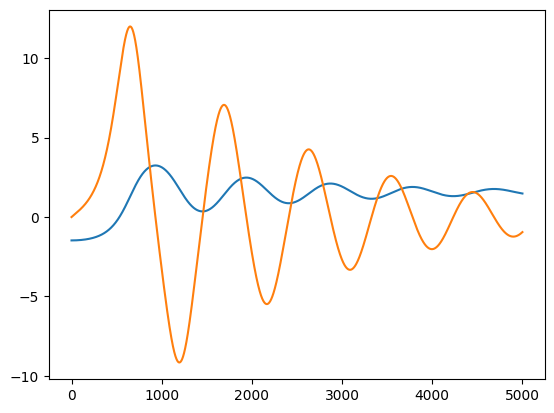

In [17]:
def run_pendulum(T, Limb, M):
    dt = T[1] - T[0]
    N = len(T)
    W = np.zeros(len(T))
    Q = np.zeros(len(T))
    for i in range(N):
        Q[i] = Limb.q
        W[i] = Limb.w
        Limb.step(dt=dt, M=M[i])
    return W, Q

def test_Pendulum():
    Limb = Pendulum(q0=-np.pi/2+.1, b=0.01)
    T = np.linspace(0, 5000, 20000)
    M = 0.0*np.sin(T/100)
    W, Q = run_pendulum(T, Limb, M)
    plt.figure()
    plt.plot(T, Q)
    plt.plot(T, W)
    plt.show()
test_Pendulum()

0.8971402930932747


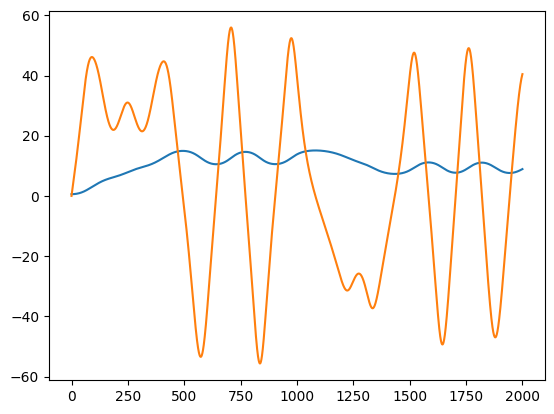

In [13]:
def run_OneDOFLimb(T, Limb, Flex, Ext):
    dt = T[1] - T[0]
    N = len(T)
    W = np.zeros(len(T))
    Q = np.zeros(len(T))
    for i in range(N):
        Q[i] = Limb.q
        W[i] = Limb.w
        Limb.step(dt=dt, F_flex=Flex[i], F_ext=Ext[i])
    return W, Q

def test_OneDOFLimb():
    Limb = OneDOFLimb(q0=np.pi/2-1, a1=7, a2=30)
    print(Limb.own_T)
    T = np.linspace(0, 2000, 20000)
    # Flexor force
    F_flex= 1*np.cos(np.pi/1000*T)
    # Extensor force
    F_ext= 1*np.sin(np.pi/1000*T)
    W, Q = run_OneDOFLimb(T, Limb, F_flex, F_ext)
    plt.figure()
    plt.plot(T, Q)
    plt.plot(T, W)
    plt.show()
test_OneDOFLimb()

0.8971402930932747


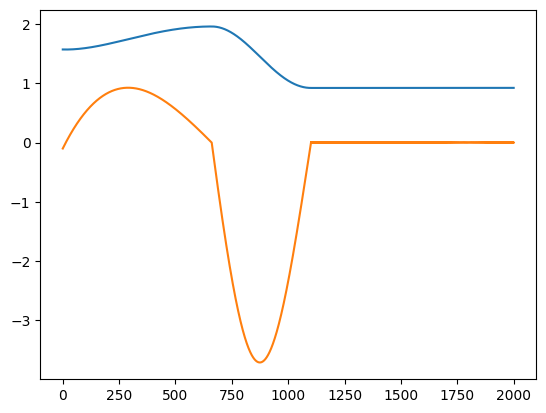

In [14]:
def test_OneDOFLimb_withGR():
    Limb = OneDOFLimb_withGR(q0=np.pi/2, w0=-0.1, a1=7, a2=30, b=0.01)
    print(Limb.own_T)
    T = np.linspace(0, 2000, 20000)
    F_flex= 0.01*np.cos(np.pi/1000*T)
    F_ext= 0.01*np.sin(np.pi/1000*T)
    W, Q = run_OneDOFLimb(T, Limb, F_flex, F_ext)
    plt.figure()
    plt.plot(T, Q)
    plt.plot(T, W)
    plt.show()
test_OneDOFLimb_withGR()

## Systems
### Afferented_Limb
```python
class Afferented_Limb:
    """
    Limb generating afferent feedback, controlled by two muscles
    """
    def __init__(self, 
                 # Limb can recive signals from muscles
                 Limb = OneDOFLimb(),
                 # Muscles
                 Flexor = SimpleAdaptedMuscle(),
                 Extensor = SimpleAdaptedMuscle()
                ):
        # creating afferent class to calc feedback
        self.Afferents = Afferents()
        # save limbs
        self.Limb = Limb
        # set theshold muscle length to cals afferent feedback
        self.Afferents.L_th = np.sqrt(self.Limb.a1**2+self.Limb.a2**2)
        self.Flexor = Flexor
        self.Extensor = Extensor
        # Output afferent vector
        self.output = np.zeros(6)# Ia_f, II_f, Ib_f, Ia_e, II_e, Ib_f
        self.F_flex = 0
        self.F_ext = 0
  
    @property
    def q(self):
        return self.Limb.q

    @property
    def w(self):
        return self.Limb.w

    def calc_afferents(self):
        # Limb_state
        q = self.Limb.q # angle
        w = self.Limb.w # rotation
        # Calc muscles' state
        L_flex = self.Limb.L(q)
        v_flex = self.Limb.h(L_flex, q)*w
        L_ext = self.Limb.L(np.pi-q)
        v_ext = -self.Limb.h(L_ext, np.pi-q)*w
        
        # Flexor afferents
        self.output[0] = self.Afferents.Ia(v_flex, L_flex, self.Flexor.x)
        self.output[1] = self.Afferents.II(L_flex, self.Flexor.x)
        self.output[2] = self.Afferents.Ib(self.F_flex)
        
        #Extensor afferents
        self.output[3] = self.Afferents.Ia(v_ext, L_ext, self.Extensor.x)
        self.output[4] = self.Afferents.II(L_ext, self.Extensor.x)
        self.output[5] = self.Afferents.Ib(self.F_ext)


    def step(self, dt=0.1, uf=0, ue=0):
        # uf - flexor input, ue - extensor input
        self.Flexor.step(dt=dt, u=uf)
        self.Extensor.step(dt=dt, u=ue)
        self.F_flex = self.Flexor.F
        self.F_ext = self.Extensor.F
        self.Limb.step(dt=dt, F_flex=self.F_flex, F_ext=self.F_ext)
        self.calc_afferents()
```

In [ ]:
from scipy import signal as sig
def run_Aff_Limb(T, AL, uf, ue):
    dt = T[1] - T[0]
    M = np.zeros(len(T))
    F_f = np.zeros(len(T))
    F_e = np.zeros(len(T))
    W = np.zeros(len(T))
    Q = np.zeros(len(T))
    Output = np.zeros((len(T), 6))
    for i, t in enumerate(T):
        F_f[i] = AL.Flexor.F_prev
        F_e[i] = AL.Extensor.F_prev
        M[i] = AL.Limb.M_tot  
        Q[i] = AL.Limb.q
        W[i] = AL.Limb.w
        Output[i] = AL.output
        AL.step(dt=dt, uf=uf[i], ue=ue[i])
    return M, F_f, F_e, W, Q, Output 

def test_Afferented_Limb():
    """
    1) first of all lest generate meandr signal from scipy.signal.square
    and send it to Limb
    2) Lets generate output from simple spg and send it to system
    """ 
    flexor = SimpleAdaptedMuscle(w = 0.5, N=2)
    extensor = SimpleAdaptedMuscle(w = 0.4, N=2)
    Limb = OneDOFLimb(q0=np.pi/2, b=0.00, a1 = 0.4,
                      a2= 0.05, m=0.3, l=0.3)
    AL = Afferented_Limb(
                Limb = Limb,
                Flexor = flexor,
                Extensor = extensor
            )
    

    T = np.linspace(0, 10000, 20000)
    mod_sig = np.sin(1*np.pi*T/1000)

    uf = 15*(sig.square(2*np.pi*T/50, duty=0.2)+1)
    uf = np.where(mod_sig>0.6, uf, 0)
    ue = 15*(sig.square(2*np.pi*T/50, duty=0.2)+1)
    ue = np.where(mod_sig<-0.6, ue, 0)

    M, F_f, F_e, W, Q, Output=run_Aff_Limb(
            T, AL, uf, ue)
    Ia_f = Output[:, 0]
    Ia_e = Output[:, 3]
    II_f = Output[:, 1]
    II_e = Output[:, 4]
    Ib_f = Output[:, 2]
    Ib_e = Output[:, 5]

    # Calculate muscle length
    L_f = AL.Limb.L(Q)
    firing_Lf = np.where(L_f >= AL.Afferents.L_th)
    L_e = AL.Limb.L(np.pi-Q)
    firing_Le = np.where(L_e >= AL.Afferents.L_th)
    # Calculate momentum arm
    hf = AL.Limb.h(L_f, Q)
    he = AL.Limb.h(L_e, np.pi-Q)
    # calc muscle speed
    vf = W*hf
    ve = -W*he
    firing_vf = np.where(vf>0)
    firing_ve = np.where(ve>0)
    
    # Plotting
    plt.figure()
    
    plt.subplot(321)
    plt.title("Control signal")
    plt.plot(T, uf, label='uf', linewidth=0.5)
    plt.plot(T, ue, label='ue', linewidth=0.5)
    plt.legend()
    plt.xlabel("t, seconds", loc='left')
    
    plt.subplot(322)
    plt.title("muscles")
    plt.plot(T, F_e, label="F_ext")
    plt.plot(T, F_f, label="F_flex")
    plt.plot(T, AL.Afferents.F_th*np.ones(len(T)),
             color="red", label="F_th")
    plt.legend()
    plt.ylabel('F, N')
    plt.xlabel("t, seconds", loc="left")
    
    plt.subplot(323)
    #plt.plot(T, M, label="M")
    #plt.plot(T, hf, label="hf")
    #plt.plot(T, he, label="he")
    plt.plot(T, Q, label="q")
    plt.legend()
    plt.subplot(324)
    plt.title('Muscle length dynamics')
    plt.plot(T, L_f, label="L_f")
    #plt.plot(T, vf, label='vf')
    plt.plot(T, L_e, label="L_e")
    #plt.plot(T, vf, label='vf')
    plt.plot(T, AL.Afferents.L_th*np.ones(len(T)), color="red", label="L_th")
    plt.legend()
    plt.xlabel("t, seconds", loc='left')
    plt.show()



    plt.figure()
    
    plt.subplot(211)
    plt.title("Ia-type activity")
    m = 0
    M = 0.5
    st = 0.5
    plt.vlines(T[firing_vf], m, M, color='orange', alpha=0.5, label="f_strech")
    plt.vlines(T[firing_Lf], m+st, M+st, color='yellow', alpha=0.5,label="Lf>=L_th")
    plt.plot(T, Ia_f, label='Ia_f', color='k')
    plt.legend()

    plt.subplot(212)
    plt.vlines(T[firing_ve], m, M, color='orange', alpha=0.5, label="e_strech")
    plt.vlines(T[firing_Le], m+st, M+st, color='yellow', alpha=0.5,label='Le>=L_th')
    plt.plot(T, Ia_e, label='Ia_e', color='k')
    plt.legend()
    plt.xlabel("t, seconds", loc='left')
    plt.show()

    plt.figure()
    
    plt.subplot(211)
    plt.title("II-type activity")
    m = 0
    M = 0.1
    st = 0
    plt.vlines(T[firing_Lf], m+st, M+st, color='yellow', alpha=0.5,label="Lf>=L_th")
    plt.plot(T, II_f, label='Ia_f', color='k')
    plt.legend()

    plt.subplot(212)
    plt.vlines(T[firing_Le], m+st, M+st, color='yellow', alpha=0.5,label='Le>=L_th')
    plt.plot(T, II_e, label='Ia_e', color='k')
    plt.legend()
    plt.xlabel("t, seconds", loc='left')
    plt.show()
test_Afferented_Limb()

## Net_Limb_connect
Target class to simulate our work. There IO_Network of Izhikevich neurons and afferented Limb. In simulation we have to params dt - discrete time step and input - input current vector
```python
class Net_Limb_connect:
    
    def __init__(self,
                 Network = Izhikevich_IO_Network(input_size=2,
                                                 output_size=2,
                                                 afferent_size=6,
                                                 N = 4),
                 Limb = Afferented_Limb()):
        self.net = Network
        self.net.set_init_conditions(
                np.random.normal(size=self.net.N, scale=0.5)
                )
        self.Limb = Limb
    
    @property
    def V(self):
        return self.net.V_prev

    @property
    def U(self):
        return self.net.U_prev

    @property
    def F_flex(self):
        return self.Limb.Flexor.F_prev

    @property
    def F_ext(self):
        return self.Limb.Extensor.F_prev

    @property
    def q(self):
        return self.Limb.q

    @property
    def w(self):
        return self.Limb.w

    def step(self, dt=0.1, Iapp=0):
        # running network
        self.net.step(dt=dt, Iapp=Iapp, Iaff=self.Limb.output)
        # running limb
        self.Limb.step(dt=dt, uf=self.net.V_out[0],
                       ue=self.net.V_out[1])
```

In [ ]:
def test_Net_Limb_connect():
    Q_app = np.array([
            [1, 0],
            [0, 0],
            [0, 1],
            [0, 0]
        ])
    print(Q_app.shape)
    Q_aff = 1*np.random.rand(4, 6)
    P = np.array([
            [1, 0, 0, 0],
            [0, 0, 1, 0]
        ])
    types = ['CH', 'FS', 'CH', 'FS']
    print(types)
    # Create params' array from neurons
    A, B, C, D = types2params(types)
    A[0] = 0.004
    A[2] = 0.004
    print(A, B, C, D)
    net = Izhikevich_IO_Network(input_size = 2, output_size = 2, 
                                afferent_size = 6,
                                N=4, Q_app = Q_app,
                                Q_aff = Q_aff , P = P)
    net.set_params(a=A, b=B, c=C, d=D) 
    # Neuron_weigths
    W = [
            [0, 0, 0, -1.1],
            [1.7, 0, 0, 0],
            [0, -1.1, 0, 0],
            [0, 0, 1.7, 0]
        ]
    
    N=4
    net.M = np.ones((N, N))
    net.set_weights(W)
    tau_syn = 20*np.ones((N, N))
    net.set_synaptic_relax_constant(tau_syn)
    print(net.tau_syn)
    print(net.W)
    print(net.M)
    
    # Limb settings
    flexor = SimpleAdaptedMuscle(w = 0.5, N=2)
    extensor = SimpleAdaptedMuscle(w = 0.4, N=2)
    Limb = OneDOFLimb(q0=np.pi/2+0.4, b=0.001, a1 = 0.4,
                      a2= 0.05, m=0.3, l=0.3)
    AL = Afferented_Limb(
                Limb = Limb,
                Flexor = flexor,
                Extensor = extensor
            )

    # Creating all system
    sys = Net_Limb_connect(Network=net,
                           Limb = AL)

    
    T = np.linspace(0, 20000, 50000)
    I = np.zeros(2)
    I[0] = 5
    I[1] = 5
    input = lambda t: (I)
    V = np.zeros((len(T), N))
    F_flex = np.zeros(len(T))
    F_ext = np.zeros(len(T))
    Afferents = np.zeros((len(T), 6))
    Q = np.zeros(len(T))
    W = np.zeros(len(T))
    dt = T[1] - T[0]
    for i, t in enumerate(T):
        V[i] = sys.net.V_prev
        F_flex[i] = sys.F_flex
        F_ext[i] = sys.F_ext
        Afferents[i] = sys.Limb.output
        Q[i] = sys.q
        W[i] = sys.w
        sys.step(dt = dt, Iapp = input(t))

    plt.figure()
    plt.subplot(221)
     
    for i in range(N):
        plt.plot(T, V[:, i], label=f"{sys.net.names[i]}")
    plt.legend()

    plt.subplot(222)
    plt.plot(T, F_flex, label='flexor')
    plt.plot(T, F_ext, label='extensor')
    plt.legend()

    plt.subplot(223)
    aff_types = ['Ia_f', 'II_f', 'Ib_f', 'Ia_e', 'II_e', 'Ib_f' ]
    for i in range(6):
        plt.plot(T, Afferents[:, i], label=aff_types[i])
    plt.legend()

    plt.subplot(224)
    plt.plot(T, Q, label="Q")
    plt.plot(T, W, label='W')
    plt.legend()
    plt.show()

test_Net_Limb_connect()